<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day7/Glass_Classification_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

names = ['ID', 'Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type']
df = pd.read_csv('glass.csv',names=names)

In [0]:
Xfeatures = ['ID', 'Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron']
X = np.array(df[Xfeatures])
y_old = np.array([df['Type']])
y_new = []

for i in y_old:
  sub = i - 1
  y_new.append(sub)

y = np.array(y_new).reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.1)


In [0]:
Xtr_mean = np.mean(Xtr,axis = 0)
Xtr_std  = np.std(Xtr,axis = 0)

Xtr_scale = (Xtr - Xtr_mean[None,:])/Xtr_std[None,:]
Xts_scale = (Xts - Xtr_mean[None,:])/Xtr_std[None,:]

In [0]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

In [0]:
K.clear_session()


In [0]:
nin = Xtr.shape[1]
nout = max(ytr)+1
nh = 50

model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 50)                550       
_________________________________________________________________
output (Dense)               (None, 7)                 357       
Total params: 907
Trainable params: 907
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.01) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
hist = model.fit(Xtr_scale, ytr, epochs=10, batch_size=3, validation_data=(Xts_scale,yts))


Train on 192 samples, validate on 22 samples
Epoch 1/10
192/192 [==============================] - 0s 834us/sample - loss: 1.2585 - acc: 0.4740 - val_loss: 1.0890 - val_acc: 0.6364
Epoch 2/10
192/192 [==============================] - 0s 485us/sample - loss: 0.7960 - acc: 0.7552 - val_loss: 0.5869 - val_acc: 0.8182
Epoch 3/10
192/192 [==============================] - 0s 511us/sample - loss: 0.5781 - acc: 0.8125 - val_loss: 0.4240 - val_acc: 0.9091
Epoch 4/10
192/192 [==============================] - 0s 502us/sample - loss: 0.4668 - acc: 0.8490 - val_loss: 0.4465 - val_acc: 0.9091
Epoch 5/10
192/192 [==============================] - 0s 478us/sample - loss: 0.3655 - acc: 0.8958 - val_loss: 0.3982 - val_acc: 0.9545
Epoch 6/10
192/192 [==============================] - 0s 524us/sample - loss: 0.3269 - acc: 0.9010 - val_loss: 0.2467 - val_acc: 0.9545
Epoch 7/10
192/192 [==============================] - 0s 497us/sample - loss: 0.2672 - acc: 0.9271 - val_loss: 0.1928 - val_acc: 0.9545
Epo

Text(0, 0.5, 'Test accuracy')

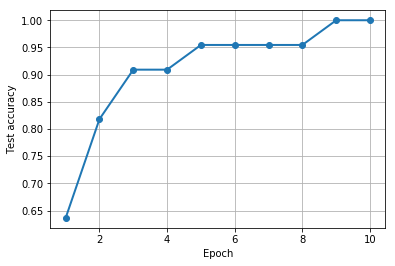

In [0]:
val_accuracy = hist.history['val_acc']
nepochs = len(val_accuracy)
plt.plot(np.arange(1,nepochs+1), val_accuracy, 'o-', linewidth=2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')

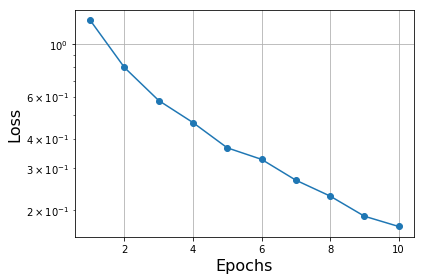

In [0]:
loss = hist.history['loss']
plt.semilogy(np.arange(1,nepochs+1), loss, 'o-')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.grid()
plt.tight_layout()